In [5]:
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Flatten


from keras.layers import Dropout
from keras.preprocessing.image import array_to_img,img_to_array,load_img

In [14]:
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

array_to_img,img_to_array,load_img
#create an image instance of the ImageDataGenerator
train_datagen=ImageDataGenerator(rotation_range=40,
 width_shift_range=0.25,
 height_shift_range=0.25,
 shear_range=0.2,
 zoom_range=0.2,
 rescale=1./255,
 horizontal_flip=True,
 fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
#Train data fetching from the directory of images
batch_size=16
train_data=train_datagen.flow_from_directory('D:/phani/training_set',
target_size=(150,150),batch_size=batch_size,
                                            class_mode='binary')


Found 16010 images belonging to 2 classes.


In [15]:
test_data=test_datagen.flow_from_directory('D:/phani/test_set/test_set',target_size=(150,150),batch_size=batch_size,
 class_mode='binary')


Found 2023 images belonging to 2 classes.


In [16]:
model=Sequential()
#1st convolution layer
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#2nd convolution layer
model.add(Conv2D(64,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#3rd convolution layer
model.add(Conv2D(32,(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
#converting multi dimension to 1 d array
model.add(Flatten())
model.add(Dense(units=150,activation='relu'))
model.add(Dropout(0.2))
#output layer
model.add(Dense(units=1,activation='sigmoid'))
print(model.summary())
Model: "sequential_2"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
result=model.fit(train_data,
 steps_per_epoch=48//batch_size,epochs=30,
 validation_data=test_data,
 validation_steps=48//batch_size
 
 )

Epoch 1/30
3/3 [==============================] - 5s 1s/step - loss: 0.9976 - accuracy: 0.4792 - val_loss: 0.6970 - val_accuracy: 0.4792
Epoch 2/30
3/3 [==============================] - 3s 1s/step - loss: 0.6945 - accuracy: 0.5000 - val_loss: 0.6788 - val_accuracy: 0.6458
Epoch 3/30
3/3 [==============================] - 3s 1s/step - loss: 0.6738 - accuracy: 0.6458 - val_loss: 0.7428 - val_accuracy: 0.3750
Epoch 4/30
3/3 [==============================] - 3s 1s/step - loss: 0.7256 - accuracy: 0.5000 - val_loss: 0.6647 - val_accuracy: 0.6250
Epoch 5/30
3/3 [==============================] - 2s 1s/step - loss: 0.6962 - accuracy: 0.5417 - val_loss: 0.6999 - val_accuracy: 0.3125
Epoch 6/30
3/3 [==============================] - 2s 995ms/step - loss: 0.7011 - accuracy: 0.4375 - val_loss: 0.7064 - val_accuracy: 0.4167
Epoch 7/30
3/3 [==============================] - 3s 990ms/step - loss: 0.6936 - accuracy: 0.5208 - val_loss: 0.7110 - val_accuracy: 0.3750
Epoch 8/30
3/3 [===================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


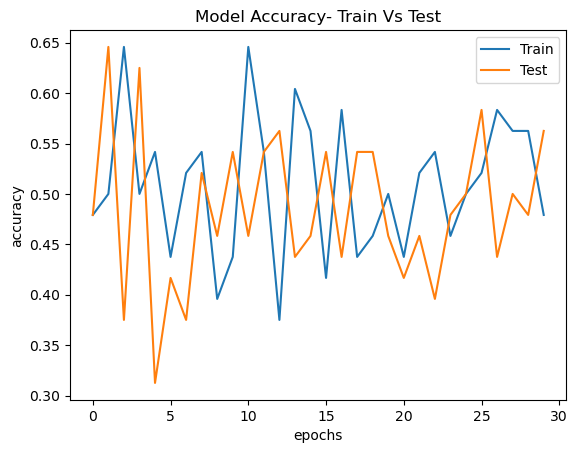

NameError: name 'dict_keys' is not defined

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
print(result.history.keys())
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


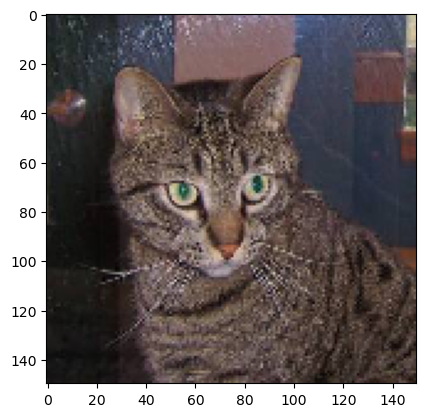

In [21]:
img=load_img('D:/phani/training_set/training_set/cats/cat.1.jpg',
 target_size=(150,150))
plt.imshow(img)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
array_to_img,img_to_array,load_img
import tensorflow as tf
img_array=keras.utils.img_to_array(img)
img_array=tf.expand_dims(img_array,0)
predictions=model.predict(img_array)
score=float(predictions[0])
print(f"This image is {100*(1-score):.2f}%cat and {100 * score:.2f}% dog")